# About: Deep Learning '23 Assignment 1


We will perform Image Classification task on the MNIST dataset which has 70,000 28*28 images labelled into 10 classes. 

**Total Marks: 60**


**Fill these**

Name: `Aman Sharma`

Roll Number: `20CS30063`

**Instructions:**

1. We have left code cells blank for you to fill up with appropriate code. Do not add any extra code cells. Strictly follow the format and fill up the cells with the correct code. Refer to cell comments for what to fill in that cell.

2. *Do not* use any training frameworks like PyTorch Lightning. This assignment will test your ability to write custom training loops.

3. Save the notebook with cell outputs of all cells. The cell outputs  will be used for evaluating your submission.




In [1]:
import torch
import torch.nn
import random
import numpy as np

from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader


## Add any other imports here
import matplotlib.pyplot as plt

In [2]:
SEED=42
torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)

## Getting the data

In [3]:
train_data = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST('data', train=False, download=True, transform=transforms.ToTensor())
train, val = random_split(train_data, [50000, 10000], generator=torch.Generator().manual_seed(SEED))

train_loader = DataLoader(train, batch_size=64, shuffle=True)
val_loader = DataLoader(val, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

print(len(train), len(val), len(test_data))

50000 10000 10000


## Defining the Model [18 marks]

You will define 3 models, with 2, 3, 4 hidden layers respectively. Lets call these models A, B, C. We will be studying the comparitive performance of these 3 models on this task.

Use ReLU as the activation function for all three models. Later we will experiment with other activation functions as well.

### Model A

Architecture:

1. Input Layer 
2. Hidden Layer (Dimension Size - 64)
3. Activation Function
4. Hidden Layer (Dimension Size - 128)
5. Activation Function
6. Output Layer (Dimension Size = Number of Classes = 10)

In [4]:
# Model A Definition 
class ModelA(torch.nn.Module):
    def __init__(self):
        super(ModelA, self).__init__()
        self.fc1 = torch.nn.Linear(28*28, 64)
        self.fc2 = torch.nn.Linear(64, 128)
        self.fc3 = torch.nn.Linear(128, 10)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x
# Fill in appropriately while maintaining the name of the variable
modelA = ModelA()

### Model B


Architecture:

1. Input Layer 
2. Hidden Layer (Dimension Size - 64)
3. Activation Function
4. Hidden Layer (Dimension Size - 128)
5. Activation Function
6. Hidden Layer (Dimension Size - 256)
7. Activation Function
8. Output Layer (Dimension Size = Number of Classes = 10)

In [5]:
# Model B Definiton
class ModelB(torch.nn.Module):
    def __init__(self):
        super(ModelB, self).__init__()
        self.fc1 = torch.nn.Linear(28*28, 64)
        self.fc2 = torch.nn.Linear(64, 128)
        self.fc3 = torch.nn.Linear(128, 256)
        self.fc4 = torch.nn.Linear(256, 10)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Use the same variable name
modelB = ModelB()

### Model C


Architecture

1. Input Layer 
2. Hidden Layer (Dimension Size - 64)
3. Activation Function
4. Hidden Layer (Dimension Size - 128)
5. Activation Function
6. Hidden Layer (Dimension Size - 256)
7. Activation Function
8. Hidden Layer (Dimension Size - 512)
9. Activation Function
10. Output Layer (Dimension Size = Number of Classes = 10)

In [6]:
# Model C Definition
class ModelC(torch.nn.Module):
    def __init__(self):
        super(ModelC, self).__init__()
        self.fc1 = torch.nn.Linear(28*28, 64)
        self.fc2 = torch.nn.Linear(64, 128)
        self.fc3 = torch.nn.Linear(128, 256)
        self.fc4 = torch.nn.Linear(256, 512)
        self.fc5 = torch.nn.Linear(512, 10)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.fc5(x)
        return x

# Use the same variable name
modelC = ModelC()

## Loss Function & Optimizer [2 marks]

* Loss Function: Cross Entropy Loss
* Optimizer : Adam

Use PyTorch Library versions for these two.

In [7]:
# Use the same variable names
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelA.parameters(), lr=0.001)

## Training Loop [30 marks]

We give you the freedom to choose Hyperparameters like learing rate, number of epochs etc, but take care to use the **same** hyperparameters for all the 3 models. Also clearly state the hyperparameters you have chosen

For each model, You need to report these metrics: Train Loss, Val Loss, Train Accuracy, Val Accuracy at the end of each epoch.

Also plot the graphs of the following (in separate cells)
1. Train Loss & Val Loss V/s Epoch
2. Train Accuracy & Val Accuracy V/s Epoch

In [8]:
# Define the hyperparameters (same for all 3 models) here
epochs = 10
lr = 0.001
batch_size = 64

### Model A 



In [9]:
# Training Loop for model A
train_losses = []
val_losses = []
train_acc = []
val_acc = []
for epoch in range(epochs):
    modelA.train()
    total_loss = 0
    correct = 0
    for batch in train_loader:
        optimizer.zero_grad()
        x, y = batch
        y_hat = modelA(x)
        loss = criterion(y_hat, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        correct += (y_hat.argmax(1) == y).type(torch.float).sum().item()
    train_losses.append(total_loss/len(train_loader))
    train_acc.append(correct/len(train))
    modelA.eval()
    total_loss = 0
    correct = 0
    for batch in val_loader:
        x, y = batch
        y_hat = modelA(x)
        loss = criterion(y_hat, y)
        total_loss += loss.item()
        correct += (y_hat.argmax(1) == y).type(torch.float).sum().item()
    val_losses.append(total_loss/len(val_loader))
    val_acc.append(correct/len(val))
    print('Epoch: {}, Train Loss: {}, Train Accuracy: {}, Val Loss: {}, Val Accuracy: {}'.format(epoch+1, train_losses[-1], train_acc[-1], val_losses[-1], val_acc[-1]))

Epoch: 1, Train Loss: 0.3941916764077857, Train Accuracy: 0.88924, Val Loss: 0.2394112371809923, Val Accuracy: 0.9312
Epoch: 2, Train Loss: 0.18212046811495292, Train Accuracy: 0.94684, Val Loss: 0.16998124674294784, Val Accuracy: 0.9499
Epoch: 3, Train Loss: 0.12887641591736881, Train Accuracy: 0.96102, Val Loss: 0.14493126871811737, Val Accuracy: 0.9583
Epoch: 4, Train Loss: 0.09821152672185884, Train Accuracy: 0.96982, Val Loss: 0.12732487113161642, Val Accuracy: 0.9605
Epoch: 5, Train Loss: 0.07875482145996998, Train Accuracy: 0.97552, Val Loss: 0.12270479661762525, Val Accuracy: 0.964
Epoch: 6, Train Loss: 0.0629959581836658, Train Accuracy: 0.98048, Val Loss: 0.11538135396779343, Val Accuracy: 0.9648
Epoch: 7, Train Loss: 0.05512047649386203, Train Accuracy: 0.98216, Val Loss: 0.11467648301700688, Val Accuracy: 0.967
Epoch: 8, Train Loss: 0.04397548281352746, Train Accuracy: 0.98604, Val Loss: 0.11462681106170106, Val Accuracy: 0.9671
Epoch: 9, Train Loss: 0.037658344467302735, T

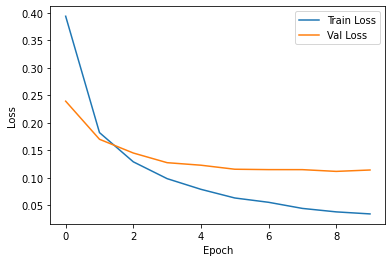

In [10]:
# Plot Graph of Train & Val Loss vs Epoch (together in same plot) for model A
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

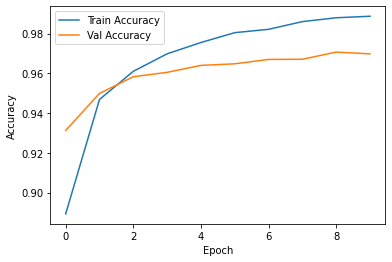

In [11]:
# Plot Graph of Train & Val Accuracy vs Epoch (together in same plot) for model A
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Model B


In [12]:
# Training Loop for model B
optimizer = torch.optim.Adam(modelB.parameters(), lr=0.001)
train_losses = []
val_losses = []
train_acc = []
val_acc = []
for epoch in range(epochs):
    modelB.train()
    total_loss = 0
    correct = 0
    for batch in train_loader:
        optimizer.zero_grad()
        x, y = batch
        y_hat = modelB(x)
        loss = criterion(y_hat, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        correct += (y_hat.argmax(1) == y).type(torch.float).sum().item()
    train_losses.append(total_loss/len(train_loader))
    train_acc.append(correct/len(train))
    modelB.eval()
    total_loss = 0
    correct = 0
    for batch in val_loader:
        x, y = batch
        y_hat = modelB(x)
        loss = criterion(y_hat, y)
        total_loss += loss.item()
        correct += (y_hat.argmax(1) == y).type(torch.float).sum().item()
    val_losses.append(total_loss/len(val_loader))
    val_acc.append(correct/len(val))
    print('Epoch: {}, Train Loss: {}, Train Accuracy: {}, Val Loss: {}, Val Accuracy: {}'.format(epoch+1, train_losses[-1], train_acc[-1], val_losses[-1], val_acc[-1]))

Epoch: 1, Train Loss: 0.3590046931820376, Train Accuracy: 0.89056, Val Loss: 0.19916388250080644, Val Accuracy: 0.9399
Epoch: 2, Train Loss: 0.15049263672031404, Train Accuracy: 0.95444, Val Loss: 0.14007598501007268, Val Accuracy: 0.958
Epoch: 3, Train Loss: 0.10989638347812283, Train Accuracy: 0.9659, Val Loss: 0.12879851416560115, Val Accuracy: 0.9619
Epoch: 4, Train Loss: 0.08614036338129903, Train Accuracy: 0.97324, Val Loss: 0.11966051998293134, Val Accuracy: 0.9645
Epoch: 5, Train Loss: 0.07012422267488107, Train Accuracy: 0.9784, Val Loss: 0.10319004869563089, Val Accuracy: 0.9702
Epoch: 6, Train Loss: 0.05690970428971588, Train Accuracy: 0.9816, Val Loss: 0.11885732511699104, Val Accuracy: 0.9676
Epoch: 7, Train Loss: 0.049002781109598555, Train Accuracy: 0.98434, Val Loss: 0.10782688511772805, Val Accuracy: 0.9696
Epoch: 8, Train Loss: 0.04222654609296642, Train Accuracy: 0.98614, Val Loss: 0.10277512549737076, Val Accuracy: 0.9705
Epoch: 9, Train Loss: 0.036284207115414295, 

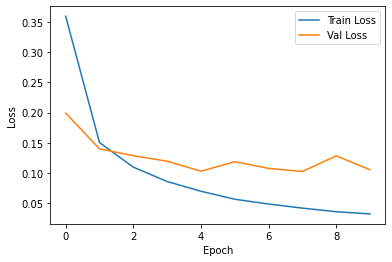

In [13]:
# Plot Graph of Train & Val Loss vs Epoch (together in same plot) for model B
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

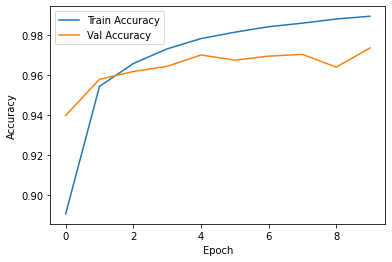

In [14]:
# Plot Graph of Train & Val Accuracy vs Epoch (together in same plot) for model B
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Model C


In [15]:
# Training Loop for model C
optimizer = torch.optim.Adam(modelC.parameters(), lr=0.001)
train_losses = []
val_losses = []
train_acc = []
val_acc = []
for epoch in range(epochs):
    modelC.train()
    total_loss = 0
    correct = 0
    for batch in train_loader:
        optimizer.zero_grad()
        x, y = batch
        y_hat = modelC(x)
        loss = criterion(y_hat, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        correct += (y_hat.argmax(1) == y).type(torch.float).sum().item()
    train_losses.append(total_loss/len(train_loader))
    train_acc.append(correct/len(train))
    modelC.eval()
    total_loss = 0
    correct = 0
    for batch in val_loader:
        x, y = batch
        y_hat = modelC(x)
        loss = criterion(y_hat, y)
        total_loss += loss.item()
        correct += (y_hat.argmax(1) == y).type(torch.float).sum().item()
    val_losses.append(total_loss/len(val_loader))
    val_acc.append(correct/len(val))
    print('Epoch: {}, Train Loss: {}, Train Accuracy: {}, Val Loss: {}, Val Accuracy: {}'.format(epoch+1, train_losses[-1], train_acc[-1], val_losses[-1], val_acc[-1]))

Epoch: 1, Train Loss: 0.3467364949257592, Train Accuracy: 0.89186, Val Loss: 0.20217299753218698, Val Accuracy: 0.9378
Epoch: 2, Train Loss: 0.141259559701123, Train Accuracy: 0.95694, Val Loss: 0.1388082253942444, Val Accuracy: 0.9589
Epoch: 3, Train Loss: 0.1048448767055712, Train Accuracy: 0.96772, Val Loss: 0.1136285304002891, Val Accuracy: 0.9651
Epoch: 4, Train Loss: 0.08453357796115643, Train Accuracy: 0.9732, Val Loss: 0.12201495870212271, Val Accuracy: 0.9643
Epoch: 5, Train Loss: 0.0718776824902874, Train Accuracy: 0.97752, Val Loss: 0.12469082246208267, Val Accuracy: 0.9617
Epoch: 6, Train Loss: 0.0596631899092119, Train Accuracy: 0.98128, Val Loss: 0.11299064500438298, Val Accuracy: 0.9692
Epoch: 7, Train Loss: 0.05434290218048508, Train Accuracy: 0.98262, Val Loss: 0.11059278812612389, Val Accuracy: 0.9705
Epoch: 8, Train Loss: 0.046605583786962335, Train Accuracy: 0.985, Val Loss: 0.11998007921383354, Val Accuracy: 0.966
Epoch: 9, Train Loss: 0.03947300368214629, Train Ac

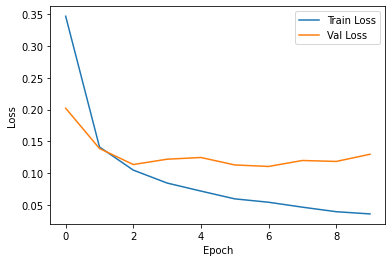

In [16]:
# Plot Graph of Train & Val Loss vs Epoch (together in same plot) for model C
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

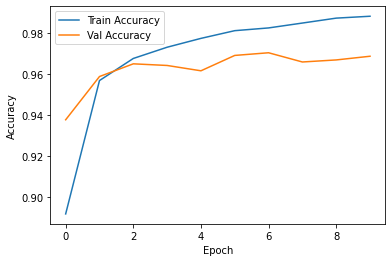

In [17]:
# Plot Graph of Train & Val Accuracy vs Epoch (together in same plot) for model C
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Choosing a Activation Function [10 marks]

Based on the best performing model you found above, define 2 more models with these 2 activation functions (1 activation function is used throughout the model definiation). Use these Activation funcitons 


*   Tanh
*   LeakyRELU

In [18]:
# Leaky ReLU model definiton
class modelLReLU(torch.nn.Module):
    def __init__(self):
        super(modelLReLU, self).__init__()
        self.fc1 = torch.nn.Linear(784, 64)
        self.fc2 = torch.nn.Linear(64, 128)
        self.fc3 = torch.nn.Linear(128, 256)
        self.fc4 = torch.nn.Linear(256, 10)
        self.leaky_relu = torch.nn.LeakyReLU()
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.leaky_relu(self.fc1(x))
        x = self.leaky_relu(self.fc2(x))
        x = self.leaky_relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Tanh model definition
class modelTanh(torch.nn.Module):
    def __init__(self):
        super(modelTanh, self).__init__()
        self.fc1 = torch.nn.Linear(784, 64)
        self.fc2 = torch.nn.Linear(64, 128)
        self.fc3 = torch.nn.Linear(128, 256)
        self.fc4 = torch.nn.Linear(256, 10)
        self.Tanh = torch.nn.LeakyReLU()
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.Tanh(self.fc1(x))
        x = self.Tanh(self.fc2(x))
        x = self.Tanh(self.fc3(x))
        x = self.fc4(x)
        return x


# Maintain these variable names
model_lrelu = modelLReLU()
model_tanh = modelTanh()

### Training 

Train these two models with the same hyperparameters. Train in separate cells given below, and report the same metrics descrived previously (train_loss, val_loss, train_acc, val_acc)

In [19]:
# Training Loop for LRELU
optimizer = torch.optim.Adam(model_lrelu.parameters(), lr=0.001)
train_losses = []
val_losses = []
train_acc = []
val_acc = []
for epoch in range(epochs):
    model_lrelu.train()
    total_loss = 0
    correct = 0
    for batch in train_loader:
        optimizer.zero_grad()
        x, y = batch
        y_hat = model_lrelu(x)
        loss = criterion(y_hat, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        correct += (y_hat.argmax(1) == y).type(torch.float).sum().item()
    train_losses.append(total_loss/len(train_loader))
    train_acc.append(correct/len(train))
    model_lrelu.eval()
    total_loss = 0
    correct = 0
    for batch in val_loader:
        x, y = batch
        y_hat = model_lrelu(x)
        loss = criterion(y_hat, y)
        total_loss += loss.item()
        correct += (y_hat.argmax(1) == y).type(torch.float).sum().item()
    val_losses.append(total_loss/len(val_loader))
    val_acc.append(correct/len(val))
    print('Epoch: {}, Train Loss: {}, Train Accuracy: {}, Val Loss: {}, Val Accuracy: {}'.format(epoch+1, train_losses[-1], train_acc[-1], val_losses[-1], val_acc[-1]))

Epoch: 1, Train Loss: 0.34465477699675906, Train Accuracy: 0.89806, Val Loss: 0.176575286586763, Val Accuracy: 0.9457
Epoch: 2, Train Loss: 0.14251885857537885, Train Accuracy: 0.95676, Val Loss: 0.1363579761948745, Val Accuracy: 0.9576
Epoch: 3, Train Loss: 0.10051377455029836, Train Accuracy: 0.9689, Val Loss: 0.11789728656031523, Val Accuracy: 0.9656
Epoch: 4, Train Loss: 0.08067434396789186, Train Accuracy: 0.97488, Val Loss: 0.13412597478859745, Val Accuracy: 0.9608
Epoch: 5, Train Loss: 0.06533671229097592, Train Accuracy: 0.97978, Val Loss: 0.1279801041848815, Val Accuracy: 0.9639
Epoch: 6, Train Loss: 0.05619660522887016, Train Accuracy: 0.9824, Val Loss: 0.12012552198283612, Val Accuracy: 0.9664
Epoch: 7, Train Loss: 0.047553729010841754, Train Accuracy: 0.98454, Val Loss: 0.13315243071692576, Val Accuracy: 0.9635
Epoch: 8, Train Loss: 0.03917977570024196, Train Accuracy: 0.98776, Val Loss: 0.11589101360727823, Val Accuracy: 0.9708
Epoch: 9, Train Loss: 0.03599522349788198, Tr

In [20]:
# Training Loop for TanH
optimizer = torch.optim.Adam(model_tanh.parameters(), lr=0.001)
train_losses = []
val_losses = []
train_acc = []
val_acc = []
for epoch in range(epochs):
    model_tanh.train()
    total_loss = 0
    correct = 0
    for batch in train_loader:
        optimizer.zero_grad()
        x, y = batch
        y_hat = model_tanh(x)
        loss = criterion(y_hat, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        correct += (y_hat.argmax(1) == y).type(torch.float).sum().item()
    train_losses.append(total_loss/len(train_loader))
    train_acc.append(correct/len(train))
    model_tanh.eval()
    total_loss = 0
    correct = 0
    for batch in val_loader:
        x, y = batch
        y_hat = model_tanh(x)
        loss = criterion(y_hat, y)
        total_loss += loss.item()
        correct += (y_hat.argmax(1) == y).type(torch.float).sum().item()
    val_losses.append(total_loss/len(val_loader))
    val_acc.append(correct/len(val))
    print('Epoch: {}, Train Loss: {}, Train Accuracy: {}, Val Loss: {}, Val Accuracy: {}'.format(epoch+1, train_losses[-1], train_acc[-1], val_losses[-1], val_acc[-1]))

Epoch: 1, Train Loss: 0.35107504351593344, Train Accuracy: 0.89334, Val Loss: 0.18542483206957008, Val Accuracy: 0.9465
Epoch: 2, Train Loss: 0.14028922643910263, Train Accuracy: 0.95798, Val Loss: 0.15619095304541908, Val Accuracy: 0.9528
Epoch: 3, Train Loss: 0.10521433582884329, Train Accuracy: 0.96642, Val Loss: 0.12377014821454597, Val Accuracy: 0.9612
Epoch: 4, Train Loss: 0.08134770040761184, Train Accuracy: 0.97472, Val Loss: 0.1287207097574404, Val Accuracy: 0.9603
Epoch: 5, Train Loss: 0.06568166896578191, Train Accuracy: 0.9796, Val Loss: 0.11688388582425797, Val Accuracy: 0.9662
Epoch: 6, Train Loss: 0.05785053542828845, Train Accuracy: 0.98184, Val Loss: 0.11381121263928284, Val Accuracy: 0.9675
Epoch: 7, Train Loss: 0.04818637206432317, Train Accuracy: 0.9841, Val Loss: 0.11143732354027118, Val Accuracy: 0.9694
Epoch: 8, Train Loss: 0.04184536222750178, Train Accuracy: 0.9862, Val Loss: 0.10252001799886251, Val Accuracy: 0.9718
Epoch: 9, Train Loss: 0.03660302508562563, T

### Results on Test Set

Report the Test Set classfication accuracy for the three activation functions (ReLU, LeakyReLU & TanH) and state which activation function gave the best performance on test set

In [21]:
# Define how to calculate Accuracy on Test Set
def test_accuracy(model, test_loader):
    model.eval()
    correct = 0
    for batch in test_loader:
        x, y = batch
        y_hat = model(x)
        correct += (y_hat.argmax(1) == y).type(torch.float).sum().item()
    return correct/len(test_data)

In [22]:
# Accuracy of RELU model
print('Accuracy of RELU model on test set: {}'.format(test_accuracy(modelA, test_loader)))

Accuracy of RELU model on test set: 0.9719


In [23]:
# Accuracy of TanH model
print('Accuracy of TanH model on test set: {}'.format(test_accuracy(model_tanh, test_loader)))

Accuracy of TanH model on test set: 0.9687


In [24]:
# Accuracy of LeakyReLU model
print('Accuracy of LeakyReLU model on test set: {}'.format(test_accuracy(model_lrelu, test_loader)))

Accuracy of LeakyReLU model on test set: 0.9741


Fill in these with the values you obtained from training.

* ReLU model Test Set Accuracy: `97.19` %
* TanH model Test Set Accuracy: `97.87` %
* LeakReLU model Test Set Accuracy: `97.41` %